## 웹크롤링 ##


- 웹 크롤링은 크롤러라는 프로그램을 인터넷으로 보내 인터넷 콘텐츠를 자동으로 수집하고 색인화 하는 작업을 말한다.


## 웹스크래핑 ##


- 웹 스크래핑은 특정 웹 사이트에서 특정 페이지의 데이터 수집을 목표로 하는 프로그램을 말한다.


- 웹 크롤링은 매우 넓은 범위에서 웹 콘텐츠를 수집하고 색인화 하여 나중에 빠르게 검색할 수 있도록 하는 것이다. 웹스트래핑은 특정 웹 페이지에서 필요한 데이터를 추추하는 것이다.
- 파이썬을 활용하여 데이터를 수집할 때 주로 웹 스크래핑을 사용한다.


## 웹 스크래핑 과정 ##


1. 웹 서버에 특정 URL로 웹 페이지를 요청한다.
2. 웹 서버는 해당 URL에 맞는 데이터를 보내준다.
3. 데이터를 찾을 때는 뷰티풀수프와 같은 라이브러리를 활용하고, CSS Selector와 같은 데이터 위치를 표시하는 기법을 사용한다.

In [19]:
# import request # 웹 스크래핑 과정에서 http 요청을 통해 데이터를 가저오기 위한 라이브러리 
from bs4 import BeautifulSoup #  뷰티풀 수프 lib 
import requests

In [20]:
html = """
    <html>
    <body>
    <h1 id='title'>파이선 스크래핑</h1>
    <p id= 'body'>웹 데이터 수집</p>
    <p class='scraping'>삼성 시세 불러오기</p>
    <p class='scraping'>4만전자 vs 7만전자</p>
    </body>
    </html>
"""

soup = BeautifulSoup(html, 'html.parser')
print(soup)
print(soup.stripped_strings)  # 스크래핑된 문자열에서 태그를 걷어낸 문자열 저장 정보 확인 


<html>
<body>
<h1 id="title">파이선 스크래핑</h1>
<p id="body">웹 데이터 수집</p>
<p class="scraping">삼성 시세 불러오기</p>
<p class="scraping">4만전자 vs 7만전자</p>
</body>
</html>

<generator object PageElement.stripped_strings at 0x0000024E86C6D560>


In [21]:
for stripped_text in soup.stripped_strings:
    print(stripped_text)

파이선 스크래핑
웹 데이터 수집
삼성 시세 불러오기
4만전자 vs 7만전자


In [22]:
# find() 함수를 사용하여 p 태그의 첫 번쨰 요소 검색 
first_p = soup.find('p')
print(first_p)

# find all () 함수로 p 태그 전체 검색 
all_ps = soup.find_all('p')
print(all_ps)

<p id="body">웹 데이터 수집</p>
[<p id="body">웹 데이터 수집</p>, <p class="scraping">삼성 시세 불러오기</p>, <p class="scraping">4만전자 vs 7만전자</p>]


In [23]:
# class 속성이 scraping인 첫 번쨰 요소 검색 
first_scraping = soup.find(attrs={'class': 'scraping'})
print(first_scraping)

# id 속성이 body 인 요소 검색 
body = soup.find(attrs={'id' : 'body'})
print(body)

<p class="scraping">삼성 시세 불러오기</p>
<p id="body">웹 데이터 수집</p>


In [24]:
# 야후 파이낸스 삼성전자 historical data: https://finance.yahoo.com/quote/005930.KS/history/

stock_url = 'https://finance.yahoo.com/quote/005930.KS/history/'

res = requests.get(stock_url)
html = res.text # 응답에서 html 문서만 가져오기

print(html)

<!DOCTYPE html>
  <html lang="en-us"><head>
  <meta http-equiv="content-type" content="text/html; charset=UTF-8">
      <meta charset="utf-8">
      <title>Yahoo</title>
      <meta name="viewport" content="width=device-width,initial-scale=1,minimal-ui">
      <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
      <style>
  html {
      height: 100%;
  }
  body {
      background: #fafafc url(https://s.yimg.com/nn/img/sad-panda-201402200631.png) 50% 50%;
      background-size: cover;
      height: 100%;
      text-align: center;
      font: 300 18px "helvetica neue", helvetica, verdana, tahoma, arial, sans-serif;
  }
  table {
      height: 100%;
      width: 100%;
      table-layout: fixed;
      border-collapse: collapse;
      border-spacing: 0;
      border: none;
  }
  h1 {
      font-size: 42px;
      font-weight: 400;
      color: #400090;
  }
  p {
      color: #1A1A1A;
  }
  #message-1 {
      font-weight: bold;
      margin: 0;
  }
  #message-2 {
      display: 

## 헤더 ##


- 헤더는 웹 브라우저와 웹 서버 간에 주고 받는 다양한 정보 체계를 말한다.
- 여기에는 사용자 에이전트, 데이터 형식 등 여러 중요한 값들이 담기며, 이러한 값들은 웹 페이지에 접속할 때 함께 전송된다.


## 사용자 에이전트 ##


- 사용하는 웹 브라우저가 어떤 OS를 쓰고 있고, 버전은 어떤 버전인지 웹 브라우저의 정보는 어떤 것인지를 담고 있다.
- 스크래핑에서는 사용자 에이전트 값을 임의로 코드에 입력하여 웹 서버가 스크래퍼를 일반 사용자로 인식할 수 있도록 만들어야 한다.


## 사용자 에이전트 값 구하기 ##


1. 야후 파이낸스 웹사이트 삼성전자 페이지에서 F12를 눌러 개발자 도구를 연다.
2. 네트워크 메뉴를 연다
3. 왼쪽 Name에 history/를 클릭한다.
4. 오른쪽 패널에서 Request Headers를 연다
5. User-Agent값을 복사한다. Accept 값도 복사한다.


- 사용자 에이전트 값을 헤더에 넣어도 요청을 보내도 서버에서 언제든 차단할 가능성이 있으므로 더 안전하고 지속적인 접근을 위해 사용자 에에전트 외에도 다른 헤더 값을 추가하기도 한다.
 - Accept: 서버가 응답으로 보낼 수 있는 콘텐츠 유형을 지정
 - Accept-Language: 요청 언어를 지정하여 웹 사이트가 반환하는 언어를 제어
 - Accept-Encoding: 응답 데이터의 압축 방식을 지정하여 서버가 데이터를 압축하여 전송할 수 있도록 한다.
 - Referer: 이전에 방문한 URL을 나타내며 정상적인 브라우저 활동으로 인식되는 데 도움이 된다.

In [27]:
# user agent
#Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/131.0.0.0 Safari/537.36

# accept
# text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7

# header settings
headers = { 
           'user-agent' :'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/131.0.0.0 Safari/537.36',
           'accept' : 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7'
           }

# 헤더를 담아서 요청 

res = requests.get(stock_url, headers=headers)
html = res.text

# res.text 를 뷰티풀 수프에 전달하여 html.parser 로 파싱 
soup = BeautifulSoup(html, 'html.parser')
print(soup.find_all('tr'))

[<tr class="yf-j5d1ld"><th class="yf-j5d1ld">Date  </th><th class="yf-j5d1ld">Open  </th><th class="yf-j5d1ld">High  </th><th class="yf-j5d1ld">Low  </th><th class="yf-j5d1ld">Close   <span class="container yf-7dju6j"><div class="icon fin-icon primary-icn sz-medium tw-align-text-top yf-4e31vg"><!-- HTML_TAG_START --><svg viewbox="0 0 24 24" xmlns="http://www.w3.org/2000/svg"><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2m0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8"></path></svg><!-- HTML_TAG_END --></div> <div class="tooltip al-bottom yf-7dju6j" role="tooltip"><div class="arrow yf-7dju6j"></div> <h3 class="title yf-7dju6j"></h3> <span class="toolTipContent yf-j5d1ld" slot="content">Close price adjusted for splits. </span></div> </span> </th><th class="yf-j5d1ld">Adj Close   <span class="container yf-7dju6j"><div class="icon fin-icon primary-icn sz-medium tw-align-text-top yf-4e31vg"><!-- HTML_TAG_START --><svg viewbox="0 

In [30]:
# 문서에서 첫번쨰 tr 요소 검색 

# tr 요소가 있을 경우 , 클라스 정보를 가저옴 
first_class = first_tr.get('class')[0]
print(first_class)

yf-j5d1ld


In [31]:
# tr 요소에 있는 td 요소 중 class 가 first_class 인 경우를 추출 
print(soup.find_all('td', class_=first_class))

[<td class="yf-j5d1ld">Jan 3, 2025</td>, <td class="yf-j5d1ld">52,800.00</td>, <td class="yf-j5d1ld">54,900.00</td>, <td class="yf-j5d1ld">52,800.00</td>, <td class="yf-j5d1ld">54,600.00</td>, <td class="yf-j5d1ld">54,600.00</td>, <td class="yf-j5d1ld">10,111,224</td>, <td class="yf-j5d1ld">Jan 2, 2025</td>, <td class="yf-j5d1ld">52,700.00</td>, <td class="yf-j5d1ld">53,600.00</td>, <td class="yf-j5d1ld">52,300.00</td>, <td class="yf-j5d1ld">53,400.00</td>, <td class="yf-j5d1ld">53,400.00</td>, <td class="yf-j5d1ld">16,630,538</td>, <td class="yf-j5d1ld">Dec 30, 2024</td>, <td class="yf-j5d1ld">53,300.00</td>, <td class="yf-j5d1ld">54,000.00</td>, <td class="yf-j5d1ld">53,100.00</td>, <td class="yf-j5d1ld">53,200.00</td>, <td class="yf-j5d1ld">53,200.00</td>, <td class="yf-j5d1ld">12,624,702</td>, <td class="yf-j5d1ld">Dec 27, 2024</td>, <td class="yf-j5d1ld">53,500.00</td>, <td class="yf-j5d1ld">54,100.00</td>, <td class="yf-j5d1ld">53,200.00</td>, <td class="yf-j5d1ld">53,700.00</td>

In [32]:
print(soup.find_all('td', class_=first_class)[0].text) # 날짜
print(soup.find_all('td', class_=first_class)[1].text) # 시가
print(soup.find_all('td', class_=first_class)[2].text) # 고가 
print(soup.find_all('td', class_=first_class)[3].text) # 저가 
print(soup.find_all('td', class_=first_class)[4].text) # 종가
print(soup.find_all('td', class_=first_class)[5].text) # 조정 종가
print(soup.find_all('td', class_=first_class)[6].text) #거래량 
print(soup.find_all('td', class_=first_class)[7].text) # 어제 날짜 

Jan 3, 2025
52,800.00
54,900.00
52,800.00
54,600.00
54,600.00
10,111,224
Jan 2, 2025


In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
first_tr = soup.find('tr')
first_class = first_tr.get('class')[0]

# use pandas to deal with dates: YYYY year MM month DD day 

print(pd.to_datetime(soup.find_all('td', class_=first_class)[0].text).strftime('%Y년 %m월 %d일'))

# . 00 을 원으로 대체하여 종가처리
print(soup.find_all('td', class_=first_class)[4].text.replace('.00' , '원'))

2025년 01월 03일
54,600원


In [43]:
# 전체 날짜 종가 데이터 가저오기 

# tr 태그 조건에서  해당하는 모든 정보 검색 
rows = soup.find_all('tr')

for i in range(1, len(rows)):
    cells = rows[i].find_all('td')
    
    if len(cells) == 7: # td 가 7개인 경우에만 처리. 배당금 정보가 포함된 행은 td 태그가 2개이므로 제외 
        date = pd.to_datetime(cells[0].text).strftime('%Y년 %M월 %D일')
        close_price = cells[4].text.replace('.00', '원')
        print(f'날짜: {date} / 종가: {close_price}')
        
        # open_price = cells[1].text.replace('.00', '')
        # high_price = cells[2].text.replace('.00', '')
        # low_price = cells[3].text.replace('.00', '')
        # volume = cells[6].text
        
        

날짜: 2025년 00월 01/03/25일 / 종가: 54,600원
날짜: 2025년 00월 01/02/25일 / 종가: 53,400원
날짜: 2024년 00월 12/30/24일 / 종가: 53,200원
날짜: 2024년 00월 12/27/24일 / 종가: 53,700원
날짜: 2024년 00월 12/26/24일 / 종가: 53,600원
날짜: 2024년 00월 12/24/24일 / 종가: 54,400원
날짜: 2024년 00월 12/23/24일 / 종가: 53,500원
날짜: 2024년 00월 12/20/24일 / 종가: 53,000원
날짜: 2024년 00월 12/19/24일 / 종가: 53,100원
날짜: 2024년 00월 12/18/24일 / 종가: 54,900원
날짜: 2024년 00월 12/17/24일 / 종가: 54,200원
날짜: 2024년 00월 12/16/24일 / 종가: 55,600원
날짜: 2024년 00월 12/13/24일 / 종가: 56,100원
날짜: 2024년 00월 12/12/24일 / 종가: 55,900원
날짜: 2024년 00월 12/11/24일 / 종가: 54,000원
날짜: 2024년 00월 12/10/24일 / 종가: 54,000원
날짜: 2024년 00월 12/09/24일 / 종가: 53,400원
날짜: 2024년 00월 12/06/24일 / 종가: 54,100원
날짜: 2024년 00월 12/05/24일 / 종가: 53,700원
날짜: 2024년 00월 12/04/24일 / 종가: 53,100원
날짜: 2024년 00월 12/03/24일 / 종가: 53,600원
날짜: 2024년 00월 12/02/24일 / 종가: 53,600원
날짜: 2024년 00월 11/29/24일 / 종가: 54,200원
날짜: 2024년 00월 11/28/24일 / 종가: 55,500원
날짜: 2024년 00월 11/27/24일 / 종가: 56,300원
날짜: 2024년 00월 11/26/24일 / 종가: 58,300원
날짜: 2024년 00

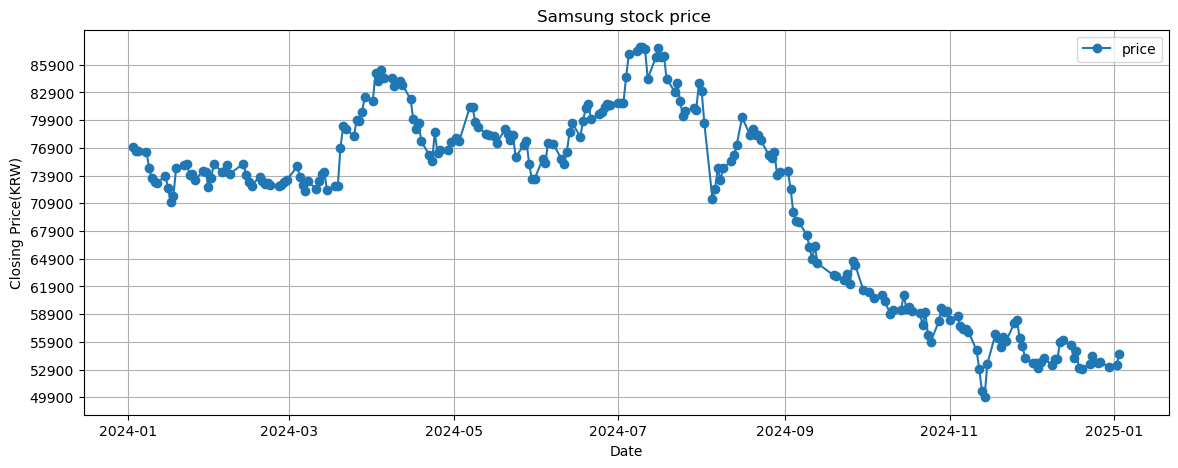

In [51]:
rows = soup.find_all('tr')

#초기화 
dates = []
prices = []

# 반복문으로 데이터 호출 

for i in range(1, len(rows)):
    cells = rows[i].find_all('td')
    
    if len(cells) == 7:
        date = pd.to_datetime(cells[0].text, format='%b %d, %Y')
        
        # 그래프 표시를 위해 종가 처리 
        close_price = cells[4].text.replace(',', '').replace('.00', '')
        
        # 초기화 변수에 호출 데이터 추가 
        dates.append(date)
        prices.append(int(close_price))

# 데이터를 데이터 프레임으로 변환 
stock_data = pd.DataFrame({'date' : dates, 'price' : prices})

# y 축 눈금 간격 설정 
min_price = min(stock_data['price'])
max_price = max(stock_data['price'])
y_ticks = range(min_price, max_price, 3000)

# 그래프 그리기

plt.figure(figsize=(14, 5))
plt.plot(stock_data['date'], stock_data['price'], marker='o', label='price')
plt.xlabel('Date')
plt.ylabel('Closing Price(KRW)')
plt.title('Samsung stock price ')
plt.legend()
plt.grid(True)
plt.yticks(y_ticks)
plt.show()